# Title: Customer Churn Modelling
## Python Notebook to classify types of Iris Flower.
### Dataset details can be found here: https://www.kaggle.com/uciml/iris# 

In [1]:
import sys
import os
import copy
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from eda_helper import EDAHelper
from preprocess_helper import PreprocessingHelper
from feature_selection_helper import FeatureSelection
from training_helper import TrainingHelper
from prediction_helper import PredictionHelper

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Exploratory Data Analysis

In [3]:
# read dataset in a dataframe
df = pd.read_csv("../Data/Iris.csv")
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
# take copy of original dataframe
df_copy = copy.deepcopy(df)

In [5]:
# perform EDA on dataframe
eda = EDAHelper(df=df)

In [6]:
eda.get_all_columns()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [7]:
eda.get_null_count()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
eda.get_unique_count()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [9]:
eda.get_numerical_columns()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
5      6            5.4           3.9            1.7           0.4
6      7            4.6           3.4            1.4           0.3
7      8            5.0           3.4            1.5           0.2
8      9            4.4           2.9            1.4           0.2
9     10            4.9           3.1            1.5           0.1
10    11            5.4           3.7            1.5           0.2
11    12            4.8           3.4            1.6           0.2
12    13            4.8           3.0            1.4           0.1
13    14            4.3           3.0            1.1           0.1
14    15            5.8           4.0            1.2           0.2
15    16            5.7           4.4            1.5           0.4
16    17            5.4           3.9            1.3           0.4
17    18            5.1           3.5            1.4           0.3
18    19            5.7           3.8            1.7           0.3
19    20            5.1           3.8            1.5           0.3
20    21            5.4           3.4            1.7           0.2
21    22            5.1           3.7            1.5           0.4
22    23            4.6           3.6            1.0           0.2
23    24            5.1           3.3            1.7           0.5
24    25            4.8           3.4            1.9           0.2
25    26            5.0           3.0            1.6           0.2
26    27            5.0           3.4            1.6           0.4
27    28            5.2           3.5            1.5           0.2
28    29            5.2           3.4            1.4           0.2
29    30            4.7           3.2            1.6           0.2
30    31            4.8           3.1            1.6           0.2
31    32            5.4           3.4            1.5           0.4
32    33            5.2           4.1            1.5           0.1
33    34            5.5           4.2            1.4           0.2
34    35            4.9           3.1            1.5           0.1
35    36            5.0           3.2            1.2           0.2
36    37            5.5           3.5            1.3           0.2
37    38            4.9           3.1            1.5           0.1
38    39            4.4           3.0            1.3           0.2
39    40            5.1           3.4            1.5           0.2
40    41            5.0           3.5            1.3           0.3
41    42            4.5           2.3            1.3           0.3
42    43            4.4           3.2            1.3           0.2
43    44            5.0           3.5            1.6           0.6
44    45            5.1           3.8            1.9           0.4
45    46            4.8           3.0            1.4           0.3
46    47            5.1           3.8            1.6           0.2
47    48            4.6           3.2            1.4           0.2
48    49            5.3           3.7            1.5           0.2
49    50            5.0           3.3            1.4           0.2
50    51            7.0           3.2            4.7           1.4
51    52            6.4           3.2            4.5           1.5
52    53            6.9           3.1            4.9           1.5
53    54            5.5           2.3            4.0           1.3
54    55            6.5           2.8            4.6           1.5
55    56            5.7           2.8            4.5           1.3
56    57            6.3           3.3            4.7           1.6
57    58            4.9           2.4            3.3           1.0
58    59            6.6           2.9            4.6 

In [10]:
eda.describe_column()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [11]:
eda.show_outlier_details()

Column    Outlier Range  No. Outliers Present
0             Id  (38.25, 112.75)                     0
1  SepalLengthCm       (5.1, 6.4)                     0
2   SepalWidthCm       (2.8, 3.3)                     4
3  PetalLengthCm       (1.6, 5.1)                     0
4   PetalWidthCm       (0.3, 1.8)                     0

In [12]:
eda.perform_pearson_correlation()

Id             SepalLengthCm    0.716676
               SepalWidthCm     0.397729
               PetalLengthCm    0.882747
               PetalWidthCm     0.899759
SepalLengthCm  SepalWidthCm     0.109369
               PetalLengthCm    0.871754
               PetalWidthCm     0.817954
SepalWidthCm   PetalLengthCm    0.420516
               PetalWidthCm     0.356544
PetalLengthCm  PetalWidthCm     0.962757
dtype: float64

In [13]:
eda.top_pearson_correlation()

PetalLengthCm  PetalWidthCm     0.962757
Id             PetalWidthCm     0.899759
               PetalLengthCm    0.882747
SepalLengthCm  PetalLengthCm    0.871754
               PetalWidthCm     0.817954
Id             SepalLengthCm    0.716676
SepalWidthCm   PetalLengthCm    0.420516
Id             SepalWidthCm     0.397729
SepalWidthCm   PetalWidthCm     0.356544
SepalLengthCm  SepalWidthCm     0.109369
dtype: float64

In [14]:
eda.get_columns_with_zero_std_deviation()

'No Columns with Zero Standard Deviation'

In [15]:
eda.get_all_columns()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

# Data Preprocessing

In [16]:
'''binary_columns = ['Gender']
categorical_columns = ['country']
numerical_columns = ['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']'''
label = 'Species'

In [17]:
preprocess = PreprocessingHelper() #Instantiate the object for PreprocessingHelper Class

In [18]:
#Removing Duplicates here
df = preprocess.remove_duplicates(df)
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [19]:
#Getting all Null Data Columns
df_with_null, cols = preprocess.get_null_data_points(df)
cols

[]

In [20]:
df = preprocess.replace_null_values(df)
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [21]:
#df = preprocess.labelencode_categorical_columns(df=df, columns=binary_columns)
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [22]:
df = preprocess.labelencode_categorical_columns(df=df, columns=[label])
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0

In [23]:
#df = preprocess.labelencode_categorical_columns(df=df, columns=categorical_columns)
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0

In [24]:
df = preprocess.remove_columns(df,['Id'])
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0

In [25]:
scale_col1 = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'] 
df = preprocess.scale_columns(df=df, columns=scale_col1, scaler_type='std')
df.head()

Species  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0        0      -0.900681      1.032057      -1.341272     -1.312977
1        0      -1.143017     -0.124958      -1.341272     -1.312977
2        0      -1.385353      0.337848      -1.398138     -1.312977
3        0      -1.506521      0.106445      -1.284407     -1.312977
4        0      -1.021849      1.263460      -1.341272     -1.312977

In [26]:
'''scale_col2 = ['XXX', 'XXX', 'XXX'] 
df = preprocess.scale_columns(df=df, columns=scale_col2, scaler_type='minmax')
df.head()'''
data, labels = preprocess.separate_label_and_features(df, label)
print(data.shape)
print(labels.shape)

(150, 4)
(150,)


# Dimension Reduction

In [27]:
df.shape

(150, 5)

In [28]:
from dimension_reduction_helper import dimensionReduction

In [29]:
dr = dimensionReduction(data=data,labels=labels)

Need only 2 components or Label Details to visualize the separation observation


0         1         2         3
0   -2.264542  0.505704 -0.121943 -0.023073
1   -2.086426 -0.655405 -0.227251 -0.103208
2   -2.367950 -0.318477  0.051480 -0.027825
3   -2.304197 -0.575368  0.098860  0.066311
4   -2.388777  0.674767  0.021428  0.037397
5   -2.070537  1.518549  0.030684 -0.004399
6   -2.445711  0.074563  0.342198  0.038097
7   -2.233842  0.247614 -0.082574  0.025505
8   -2.341958 -1.095146  0.153562  0.026794
9   -2.188676 -0.448629 -0.246560  0.039907
10  -2.163487  1.070596 -0.264009 -0.015301
11  -2.327378  0.158587  0.100166  0.134554
12  -2.224083 -0.709118 -0.223215 -0.002631
13  -2.639716 -0.938282  0.189570  0.019422
14  -2.192292  1.889979 -0.469480 -0.192782
15  -2.251465  2.722371  0.032604 -0.047126
16  -2.202750  1.513750 -0.001363 -0.186632
17  -2.190179  0.514304 -0.038616 -0.091906
18  -1.894074  1.431111 -0.370743 -0.059528
19  -2.339949  1.158033  0.137418  0.039828
20  -1.914556  0.430465 -0.416007 -0.010360
21  -2.204645  0.952457  0.164738 -0.057729
22  -2.774170  0.489517  0.338836 -0.017854
23  -1.820412  0.106751  0.040061 -0.150346
24  -2.228217  0.162186  0.124201  0.271229
25  -1.957024 -0.607893 -0.298591 -0.043837
26  -2.052063  0.266014  0.092093 -0.066601
27  -2.168194  0.552016 -0.201295 -0.009261
28  -2.140306  0.336640 -0.265315 -0.083544
29  -2.268790 -0.314879  0.075515  0.108849
30  -2.144554 -0.483942 -0.067856  0.048379
31  -1.831938  0.445267 -0.265375 -0.239141
32  -2.608203  1.828475  0.051420  0.231923
33  -2.437951  2.185392 -0.079350  0.051021
34  -2.188676 -0.448629 -0.246560  0.039907
35  -2.211120 -0.184338 -0.218625 -0.168620
36  -2.044417  0.684956 -0.479412 -0.195613
37  -2.188676 -0.448629 -0.246560  0.039907
38  -2.435952 -0.882169  0.201558  0.009961
39  -2.170547  0.292727 -0.169939 -0.006240
40  -2.286527  0.467992  0.040737 -0.105718
41  -1.871707 -2.327692 -0.194529 -0.291693
42  -2.557834 -0.453816  0.313572  0.067411
43  -1.964279  0.497392  0.314756 -0.175540
44  -2.133373  1.171432  0.252793  0.153229
45  -2.075358 -0.691917 -0.056559 -0.140295
46  -2.381258  1.150633  0.062102  0.154219
47  -2.398192 -0.362391  0.146856  0.049478
48  -2.226781  1.025483 -0.176645  0.016444
49  -2.205954  0.032238 -0.146594 -0.048778
50   1.103994  0.863112 -0.685555 -0.034978
51   0.732481  0.598636 -0.094067 -0.004454
52   1.242110  0.614822 -0.554847 -0.009673
53   0.397307 -1.758169 -0.018569 -0.067398
54   1.072594 -0.211758 -0.397447 -0.105542
55   0.384458 -0.591062  0.126798  0.240528
56   0.748715  0.778699  0.148656  0.078301
57  -0.497863 -1.848869  0.255555  0.039389
58   0.926222  0.030331 -0.595460  0.029102
59   0.004968 -1.029401  0.542867  0.028349
60  -0.124697 -2.658063 -0.039813 -0.016141
61   0.438730 -0.058881  0.206703 -0.039851
62   0.551634 -1.772582 -0.761380 -0.048354
63   0.717165 -0.185434 -0.067300  0.164556
64  -0.037258 -0.432795  0.198061 -0.109025
65   0.875891  0.509998 -0.503506 -0.105141
66   0.348006 -0.190622  0.492832  0.192059
67   0.153393 -0.790725 -0.298605  0.204321
68   1.215303 -1.633356 -0.479410 -0.228215
69   0.156941 -1.303103 -0.168587  0.050413
70   0.738256  0.402470  0.616773  0.084452
71   0.472370 -0.416608 -0.262718 -0.114245
72   1.227988 -0.940915 -0.366705  0.008448
73   0.629381 -0.416812 -0.289962  0.273495
74   0.700473 -0.063494 -0.444768 -0.044081
75   0.873537  0.250709 -0.472149 -0.102121
76   1.254222 -0.082620 -0.726844 -0.040829
77   1.358240  0.328820 -0.261458 -0.067014
78   0.662126 -0.224346  0.087368  0.036353
79  -0.047282 -1.057212 -0.315319 -0.066008
80   0.121534 -1.563592 -0.145242  0.007875
81   0.014118 -1.573392 -0.236581  0.031149
82   0.236011 -0.775924 -0.147973 -0.024460
83   1.056691 -0.636901  0.106753  0.183419
84   0.221417 -0.280848  0.667560  0.255550
85   0.431783  0.855137  0.450731  0.111146
86   1.049413  0.522197 -0.396142 -0.037299
87   1.035878 -1.392466 -0.685434 -0.139129
88   0.067068 -0.212621  0.294128  0.147491
89   0.275425 -1.329816  0.093445 -0.009948
90   0.2

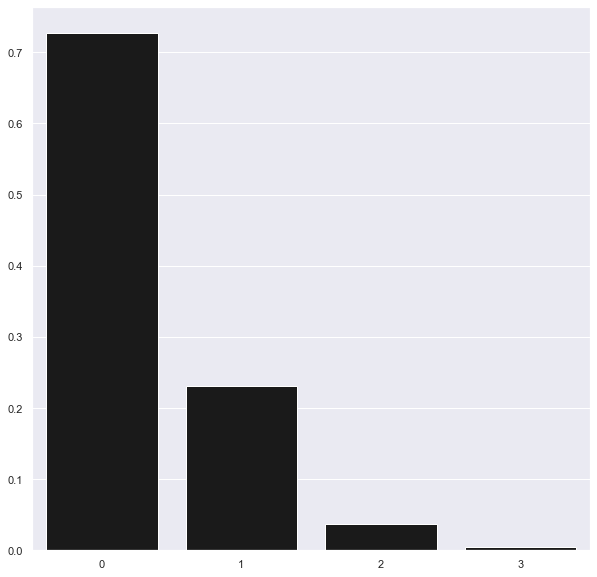

In [30]:
dr.pca(data,Variance_bar ='yes',n_components=4,sep_observation='yes')

0         1
0   -2.264280  0.505960
1   -2.085786 -0.654725
2   -2.368034 -0.318846
3   -2.304392 -0.575928
4   -2.388891  0.674479
5   -2.070742  1.518260
6   -2.446551  0.073120
7   -2.233662  0.247718
8   -2.342230 -1.095891
9   -2.188037 -0.447931
10  -2.162932  1.071365
11  -2.327656  0.157996
12  -2.223468 -0.708493
13  -2.640088 -0.939180
14  -2.191276  1.891530
15  -2.251776  2.722065
16  -2.202840  1.513619
17  -2.190107  0.514287
18  -1.893285  1.432296
19  -2.340390  1.157328
20  -1.913576  0.431804
21  -2.205114  0.951695
22  -2.775026  0.488073
23  -1.820482  0.106501
24  -2.228583  0.161476
25  -1.956228 -0.606963
26  -2.052292  0.265533
27  -2.167746  0.552561
28  -2.139668  0.337441
29  -2.268961 -0.315366
30  -2.144349 -0.483885
31  -1.831279  0.446138
32  -2.608534  1.827996
33  -2.437960  2.185448
34  -2.188037 -0.447931
35  -2.210530 -0.183683
36  -2.043267  0.686565
37  -2.188037 -0.447931
38  -2.436357 -0.883091
39  -2.170153  0.293160
40  -2.286640  0.467686
41  -1.870957 -2.327045
42  -2.558562 -0.455170
43  -1.965048  0.496147
44  -2.134119  1.170296
45  -2.075122 -0.691839
46  -2.381538  1.150161
47  -2.398519 -0.363128
48  -2.226442  1.025923
49  -2.205584  0.032598
50   1.105586  0.865672
51   0.732654  0.599031
52   1.243401  0.616918
53   0.397525 -1.758038
54   1.073598 -0.210209
55   0.384153 -0.591553
56   0.748265  0.778198
57  -0.498323 -1.849828
58   0.927659  0.032539
59   0.003736 -1.031354
60  -0.124355 -2.657908
61   0.438240 -0.059576
62   0.553655 -1.769774
63   0.717310 -0.185181
64  -0.037678 -0.433475
65   0.877087  0.511907
66   0.346785 -0.192420
67   0.154148 -0.789694
68   1.216660 -1.631455
69   0.157459 -1.302491
70   0.736700  0.400287
71   0.473068 -0.415589
72   1.228960 -0.939492
73   0.630066 -0.415795
74   0.701567 -0.061824
75   0.874681  0.252506
76   1.256002 -0.079892
77   1.358855  0.329889
78   0.661925 -0.224615
79  -0.046405 -1.056057
80   0.122027 -1.563052
81   0.014830 -1.572540
82   0.236445 -0.775360
83   1.056449 -0.637248
84   0.219766 -0.283302
85   0.430585  0.853514
86   1.050334  0.523715
87   1.037697 -1.389868
88   0.066341 -0.213714
89   0.275320 -1.330118
90   0.272142 -1.119844
91   0.623183  0.027620
92   0.330572 -0.988161
93  -0.373712 -2.018347
94   0.282673 -0.854435
95   0.088702 -0.175440
96   0.223977 -0.381073
97   0.574548 -0.152707
98  -0.457307 -1.540138
99   0.252056 -0.596194
100  1.845139  0.868223
101  1.151950 -0.703149
102  2.206804  0.555404
103  1.438240 -0.050549
104  1.866897  0.289923
105  2.755521  0.790731
106  0.356078 -1.563656
107  2.304504  0.411985
108  2.002736 -0.722305
109  2.266440  1.920236
110  1.365176  0.693069
111  1.599054 -0.428181
112  1.884179  0.414439
113  1.251794 -1.169344
114  1.461713 -0.447553
115  1.590234  0.674929
116  1.471132  0.253134
117  2.437409  2.557342
118  3.310860  0.000465
119  1.254764 -1.716537
120  2.039878  0.906776
121  0.971953 -0.574064
122  2.900087  0.401084
123  1.329274 -0.486590
124  1.703411  1.013199
125  1.958614  1.004944
126  1.171638 -0.319231
127  1.018948  0.064408
128  1.785371 -0.194086
129  1.866424  0.558049
130  2.437240  0.249473
131  2.317008  2.628090
132  1.859544 -0.185759
133  1.111701 -0.295291
134  1.197836 -0.816621
135  2.802255  0.847026
136  1.577766  1.069216
137  1.346520  0.421653
138  0.922415  0.017807
139  1.853561  0.672681
140  2.015111  0.609100
141  1.902834  0.685855
142  1.151950 -0.703149
143  2.042418  0.863655
144  2.000103  1.046508
145  1.869943  0.382172
146  1.558677 -0.905024
147  1.520405  0.266308
148  1.374035  1.013127
149  0.957978 -0.024154

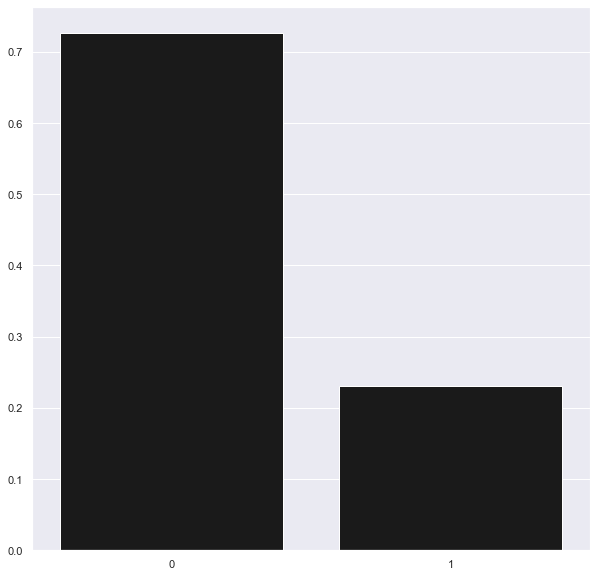

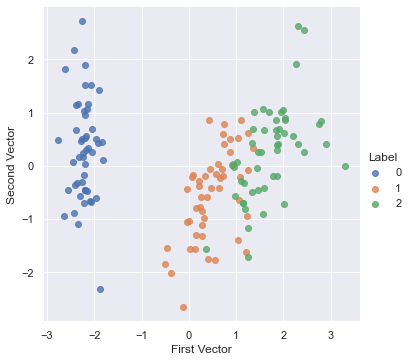

In [31]:
dr.icreamental_pca(data,Variance_bar = 'yes',n_components=2,sep_observation='yes')

In [32]:
dr.sparse_pca(data,n_components=2,sep_observation='yes')

0         1
0    2.242108 -0.500710
1    2.065784  0.648903
2    2.344513  0.315311
3    2.281397  0.569659
4    2.365110 -0.668100
5    2.049999 -1.503525
6    2.421494 -0.073837
7    2.211719 -0.245175
8    2.318797  1.084291
9    2.167017  0.444174
10   2.142040 -1.060008
11   2.304330 -0.157030
12   2.202080  0.702084
13   2.613603  0.928978
14   2.170540 -1.871280
15   2.229107 -2.695429
16   2.180904 -1.498775
17   2.168482 -0.509225
18   1.875286 -1.416953
19   2.316753 -1.146580
20   1.895590 -0.426215
21   2.182794 -0.943039
22   2.746690 -0.484685
23   1.802385 -0.105704
24   2.206152 -0.160592
25   1.937663  0.601862
26   2.031739 -0.263392
27   2.146713 -0.546564
28   2.119107 -0.333320
29   2.246335  0.311749
30   2.123333  0.479138
31   1.813790 -0.440870
32   2.582334 -1.810386
33   2.413759 -2.163768
34   2.167017  0.444174
35   2.189232  0.182500
36   2.024159 -0.678188
37   2.167017  0.444174
38   2.411855  0.873422
39   2.149050 -0.289841
40   2.263877 -0.463371
41   1.853233  2.304634
42   2.532520  0.449310
43   1.944819 -0.492477
44   2.112221 -1.159845
45   2.054827  0.685055
46   2.357653 -1.139253
47   2.374456  0.358790
48   2.204709 -1.015342
49   2.184112 -0.031931
50  -1.093084 -0.854563
51  -0.725244 -0.592705
52  -1.229826 -0.608730
53  -0.393330  1.740763
54  -1.061969  0.209666
55  -0.380637  0.585213
56  -0.741321 -0.770984
57   0.492979  1.830561
58  -0.917052 -0.030027
59  -0.004894  1.019211
60   0.123528  2.631744
61  -0.434385  0.058301
62  -0.546128  1.755032
63  -0.710060  0.183602
64   0.036900  0.428510
65  -0.867230 -0.504945
66  -0.344557  0.188738
67  -0.151854  0.782897
68  -1.203230  1.617189
69  -0.155355  1.290202
70  -0.730957 -0.398480
71  -0.467682  0.412485
72  -1.215807  0.931605
73  -0.623139  0.412688
74  -0.693535  0.062868
75  -0.864894 -0.248223
76  -1.241801  0.081807
77  -1.344800 -0.325558
78  -0.655565  0.222129
79   0.046840  1.046744
80  -0.120292  1.548112
81  -0.013940  1.557814
82  -0.233655  0.768242
83  -1.046214  0.630602
84  -0.219219  0.278070
85  -0.427530 -0.846666
86  -1.039036 -0.517022
87  -1.025587  1.378683
88  -0.066399  0.210517
89  -0.272666  1.316651
90  -0.269611  1.108360
91  -0.617001 -0.027266
92  -0.326714  0.979111
93   0.369978  1.997951
94  -0.280122  0.845498
95  -0.088167  0.173178
96  -0.222126  0.376719
97  -0.568197  0.152200
98   0.452526  1.524220
99  -0.249733  0.589963
100 -1.829401 -0.863053
101 -1.141755  0.694390
102 -2.184518 -0.548969
103 -1.424440  0.049524
104 -1.849404 -0.288298
105 -2.726946 -0.780612
106 -0.354789  1.544653
107 -2.280213 -0.405451
108 -1.981898  0.716709
109 -2.245151 -1.902405
110 -1.352403 -0.687069
111 -1.583222  0.424018
112 -1.865606 -0.410220
113 -1.240652  1.155842
114 -1.449556  0.439761
115 -1.576066 -0.670322
116 -1.456719 -0.250677
117 -2.413309 -2.531429
118 -3.276377  0.002354
119 -1.241523  1.700584
120 -2.020316 -0.898403
121 -0.964259  0.565527
122 -2.869380 -0.393839
123 -1.316021  0.481948
124 -1.687392 -1.004097
125 -1.938369 -0.993391
126 -1.160294  0.315746
127 -1.009686 -0.064887
128 -1.768321  0.191370
129 -1.846328 -0.549874
130 -2.411389 -0.244201
131 -2.293215 -2.600170
132 -1.841948  0.182855
133 -1.100262  0.293061
134 -1.185593  0.809084
135 -2.773237 -0.836371
136 -1.564537 -1.061844
137 -1.333718 -0.418067
138 -0.914291 -0.019034
139 -1.835216 -0.665755
140 -1.996210 -0.604341
141 -1.884291 -0.679222
142 -1.141755  0.694390
143 -2.023099 -0.856111
144 -1.981898 -1.038156
145 -1.852011 -0.379021
146 -1.543039  0.896358
147 -1.505794 -0.264144
148 -1.362789 -1.006289
149 -0.949801  0.022070

0         1
0    0.798968 -0.099666
1    0.674393  0.104370
2    0.763813  0.007165
3    0.713482  0.051812
4    0.787903 -0.131853
5    0.617721 -0.184601
6    0.780082 -0.057918
7    0.804101 -0.057416
8    0.591375  0.091725
9    0.726016  0.055677
10   0.715215 -0.158117
11   0.800420 -0.055307
12   0.679078  0.081336
13   0.624980  0.027491
14   0.513347 -0.189799
15   0.335908 -0.167581
16   0.625169 -0.188901
17   0.793141 -0.092832
18   0.604070 -0.169352
19   0.707544 -0.174098
20   0.734916 -0.045011
21   0.738094 -0.148466
22   0.751018 -0.131856
23   0.724811  0.035731
24   0.783278 -0.042155
25   0.659309  0.127387
26   0.779719 -0.033934
27   0.785636 -0.096022
28   0.786891 -0.060205
29   0.756561  0.023958
30   0.720778  0.072018
31   0.721769 -0.035733
32   0.536688 -0.195390
33   0.459907 -0.191107
34   0.726016  0.055677
35   0.765933  0.011781
36   0.729558 -0.101857
37   0.726016  0.055677
38   0.644215  0.057385
39   0.796586 -0.056488
40   0.800522 -0.096388
41   0.263525  0.161913
42   0.720135 -0.006109
43   0.737687 -0.060790
44   0.682656 -0.162094
45   0.668522  0.113476
46   0.708527 -0.175100
47   0.752622  0.008100
48   0.731845 -0.158286
49   0.792430 -0.019846
50  -0.373316 -0.334276
51  -0.412343 -0.149358
52  -0.447598 -0.322588
53  -0.178976  0.631300
54  -0.500543  0.075282
55  -0.341968  0.480332
56  -0.388586 -0.218695
57   0.041557  0.566366
58  -0.454649  0.021461
59  -0.160056  0.596442
60   0.018810  0.419225
61  -0.378191  0.235715
62  -0.159649  0.524289
63  -0.462086  0.214872
64  -0.176658  0.472736
65  -0.419957 -0.162278
66  -0.328392  0.304296
67  -0.234142  0.567340
68  -0.256627  0.406134
69  -0.191540  0.663365
70  -0.406784 -0.077419
71  -0.372862  0.380688
72  -0.426767  0.306956
73  -0.411688  0.339517
74  -0.430237  0.147945
75  -0.450618 -0.057356
76  -0.464931 -0.057809
77  -0.522853 -0.278700
78  -0.451810  0.249226
79  -0.139266  0.627064
80  -0.148345  0.664898
81  -0.115975  0.658038
82  -0.274846  0.565321
83  -0.485544  0.281807
84  -0.263418  0.344684
85  -0.270845 -0.142183
86  -0.462417 -0.231281
87  -0.285655  0.425308
88  -0.224067  0.378473
89  -0.225021  0.658741
90  -0.249556  0.632121
91  -0.436149  0.146252
92  -0.282298  0.602404
93   0.016677  0.563369
94  -0.288088  0.582730
95  -0.234087  0.366137
96  -0.295289  0.431384
97  -0.413537  0.240721
98   0.025525  0.603520
99  -0.298775  0.509856
100 -0.338248 -0.493013
101 -0.456865  0.241995
102 -0.421147 -0.571455
103 -0.541827 -0.138931
104 -0.492170 -0.427079
105 -0.249449 -0.565549
106 -0.150832  0.502103
107 -0.359132 -0.497595
108 -0.400678 -0.068159
109 -0.162655 -0.542604
110 -0.481996 -0.414681
111 -0.519286 -0.041221
112 -0.494483 -0.484536
113 -0.364393  0.328566
114 -0.397487 -0.013981
115 -0.443158 -0.457787
116 -0.539982 -0.287486
117 -0.037447 -0.389473
118 -0.142379 -0.388438
119 -0.256333  0.422238
120 -0.401664 -0.614278
121 -0.412517  0.227069
122 -0.211430 -0.473993
123 -0.519843  0.095491
124 -0.414693 -0.566436
125 -0.369464 -0.580435
126 -0.530341  0.085676
127 -0.514804 -0.031952
128 -0.512830 -0.214922
129 -0.405534 -0.458800
130 -0.334729 -0.471113
131 -0.026120 -0.363987
132 -0.495517 -0.243583
133 -0.518251  0.110880
134 -0.434019  0.280279
135 -0.232908 -0.565194
136 -0.330966 -0.483164
137 -0.518826 -0.305276
138 -0.493850  0.025292
139 -0.465461 -0.547100
140 -0.431954 -0.547604
141 -0.433753 -0.546528
142 -0.456865  0.241995
143 -0.405668 -0.603677
144 -0.347713 -0.587193
145 -0.475311 -0.462882
146 -0.438570  0.159149
147 -0.537125 -0.320914
148 -0.343355 -0.434366
149 -0.484434  0.031880

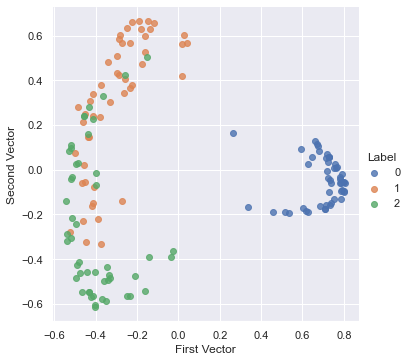

In [33]:
dr.kernel_pca(data,n_components=2,sep_observation='yes')

0         1
0   -1.914999 -0.361081
1   -1.762958  0.780467
2   -1.998963  0.465503
3   -1.944092  0.717084
4   -2.019001 -0.520163
5   -1.751987 -1.378368
6   -2.062875  0.082081
7   -1.888129 -0.106301
8   -1.974357  1.236241
9   -1.849914  0.581350
10  -1.832167 -0.929687
11  -1.965261 -0.010602
12  -1.879048  0.842527
13  -2.225887  1.099367
14  -1.860210 -1.743476
15  -1.907465 -2.562967
16  -1.863994 -1.365573
17  -1.851476 -0.373693
18  -1.606375 -1.305572
19  -1.977779 -1.002482
20  -1.621858 -0.310493
21  -1.862821 -0.806564
22  -2.341275 -0.309573
23  -1.537555  0.008548
24  -1.881255 -0.020198
25  -1.654388  0.724621
26  -1.733081 -0.134723
27  -1.834431 -0.413729
28  -1.810997 -0.202000
29  -1.914958  0.455907
30  -1.810956  0.614988
31  -1.550816 -0.329319
32  -2.206563 -1.652298
33  -2.064776 -2.018588
34  -1.849914  0.581350
35  -1.869265  0.320355
36  -1.732734 -0.555677
37  -1.849914  0.581350
38  -2.053794  1.030909
39  -1.835562 -0.155750
40  -1.932045 -0.321046
41  -1.577660  2.428560
42  -2.156664  0.613849
43  -1.657470 -0.368477
44  -1.802249 -1.027889
45  -1.752002  0.817304
46  -2.013300 -0.993069
47  -2.023528  0.511753
48  -1.884734 -0.880238
49  -1.864696  0.105428
50   1.459627 -0.837015
51   1.151746 -0.546537
52   1.578022 -0.598045
53   0.874504  1.816490
54   1.438054  0.234937
55   0.862472  0.658948
56   1.167271 -0.724627
57   0.121087  1.964878
58   1.312140  0.002181
59   0.546585  1.121302
60   0.435397  2.743152
61   0.907777  0.127363
62   0.998204  1.815612
63   1.140831  0.233614
64   0.506454  0.528655
65   1.269356 -0.470542
66   0.834082  0.266113
67   0.663898  0.868659
68   1.560962  1.637663
69   0.669153  1.378403
70   1.163487 -0.346725
71   0.932730  0.477147
72   1.571231  0.949829
73   1.065220  0.467368
74   1.123001  0.110674
75   1.268225 -0.212564
76   1.588235  0.092805
77   1.679371 -0.319039
78   1.095784  0.276848
79   0.494755  1.145830
80   0.640020  1.639580
81   0.548495  1.655391
82   0.734940  0.849833
83   1.430188  0.662105
84   0.728948  0.365010
85   0.902132 -0.778414
86   1.416885 -0.492750
87   1.407046  1.408106
88   0.595028  0.304131
89   0.771634  1.399430
90   0.768684  1.190716
91   1.061394  0.028283
92   0.814377  1.055165
93   0.225088  2.123959
94   0.777335  0.926523
95   0.612074  0.264095
96   0.727032  0.460014
97   1.017868  0.209572
98   0.154303  1.654434
99   0.750465  0.671743
100  2.638219 -0.784818
101  2.050840  0.818065
102  2.930964 -0.501171
103  2.287290  0.150380
104  2.651084 -0.213892
105  3.389810 -0.770805
106  1.385551  1.724579
107  3.008970 -0.366498
108  2.759300  0.780308
109  2.985017 -1.858645
110  2.225155 -0.583339
111  2.422244  0.514976
112  2.661256 -0.340031
113  2.136664  1.275161
114  2.317020  0.546476
115  2.419161 -0.578122
116  2.312986 -0.153849
117  3.122422 -2.504306
118  3.859168 -0.020953
119  2.131054  1.815464
120  2.794003 -0.838160
121  1.901790  0.702218
122  3.509726 -0.393781
123  2.194147  0.589831
124  2.510388 -0.922570
125  2.718093 -0.933044
126  2.062143  0.433948
127  1.934708  0.063137
128  2.581860  0.271626
129  2.637913 -0.484363
130  3.120491 -0.213631
131  3.016504 -2.568384
132  2.645384  0.259014
133  2.008146  0.412738
134  2.082369  0.925314
135  3.429414 -0.829484
136  2.411253 -0.967942
137  2.208985 -0.312931
138  1.854140  0.115785
139  2.634386 -0.594811
140  2.775825 -0.540146
141  2.677427 -0.610438
142  2.050840  0.818065
143  2.797439 -0.795109
144  2.764480 -0.973017
145  2.651730 -0.306209
146  2.388541  0.991081
147  2.356027 -0.169477
148  2.239160 -0.899484
149  1.885579  0.155637

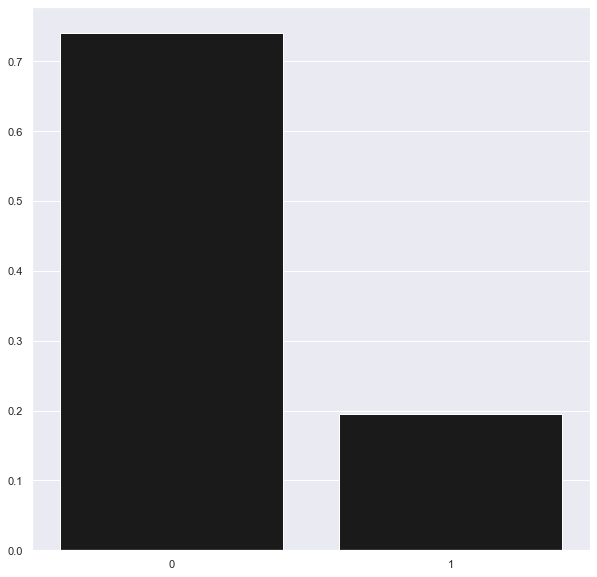

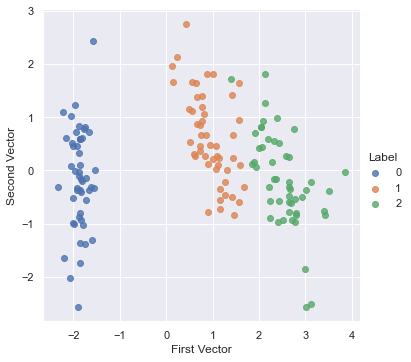

In [34]:
dr.TruncatedSVD(df,Variance_bar = 'yes',n_components=2,sep_observation='yes')

# Clustering

In [35]:
from clustering_helper import ClusteringHelper

In [36]:
clustering = ClusteringHelper()

In [37]:
clustering.get_elbow_plot(data, l_range=2, r_range=20)

In [38]:
clustering.apply_kmeans_clustering(data, n_jobs=-1, k=4)

KMeans(n_clusters=4, n_jobs=-1)